# Exploratory Data Analysis
---

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import DataSet

In [43]:
order_products_prior    = pd.read_csv('../datas/order_products__prior.csv')
aisles_df               = pd.read_csv('../datas/aisles.csv')
departments_df          = pd.read_csv('../datas/departments.csv')
orders_df               = pd.read_csv('../datas/orders.csv')
products_df             = pd.read_csv('../datas/products.csv')
order_products_train    = pd.read_csv('../datas/order_products__train_cap.csv')

### Initial Data Exploration

After the Data Sets are imported, it's important to look at what kind of data are we dealing with. I will start-off with initial insight with each dataset. Then, I will look into each dataframe in detail with trends and visualizations. 

In [44]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Initial Insights: `orders_df` consist of the information for the orders. What did the user order, on what day, what time is the order, etc...

In [45]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Initial Insights: `products_df` obtained all the prodcuts that Instacart sells with the location ID of each unique product. Each product has their own unique Id as well. `products_df` can be merged with `order_products_prior`'s product_id

In [46]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Initial Insights: `departments_df` contain the information that is in products. This is a good data to merge into `products_df` based on the unique department_id column

In [47]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Initial Insights: Similar to `departments_df`, `aisles_df` can be merge into the `prodcuts_df` to better visualize the data

In [48]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Initial Insights: `order_products_prior_df` consist a unique order_id. The order_id is corsponding with `orders_df`'s order_id. product_id cosponds with `products_df`'s id. Therefore, `order_products_prior_df` only have two new information. add_to_cart_order and redordered. 

In [49]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,36,39612,1,0
1,36,19660,2,1
2,36,49235,3,0
3,36,43086,4,1
4,36,46620,5,1


Initial Insights: Similar to `orders_prior_df` `order_products_train` have the same information. To find out the difference between train and prior, we will look into it moments later.

# Deeper Dive Data Exploration
---

As mentioned above, I will merge the order_id along with `order_df` and followed by product_id with `products_df` on their unique IDs.


In [64]:
order_products_prior_df = pd.merge(order_products_prior, orders_df, on='order_id', how='left')

In [65]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')

In [66]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


In [67]:
order_products_prior_df.shape

(32434489, 13)

After merging three dataframe together. It's good to check the size of the dataframe that I will be working on. I will be working with 32,434,489 rows of dataframe. That is considered as pretty big dataframe. 

Next, I will start to look into the dataframe. I will check what kind of products are the most popular in my dataframe. As the result shown below, majoirty of my products that are popular are fruits and organics. 


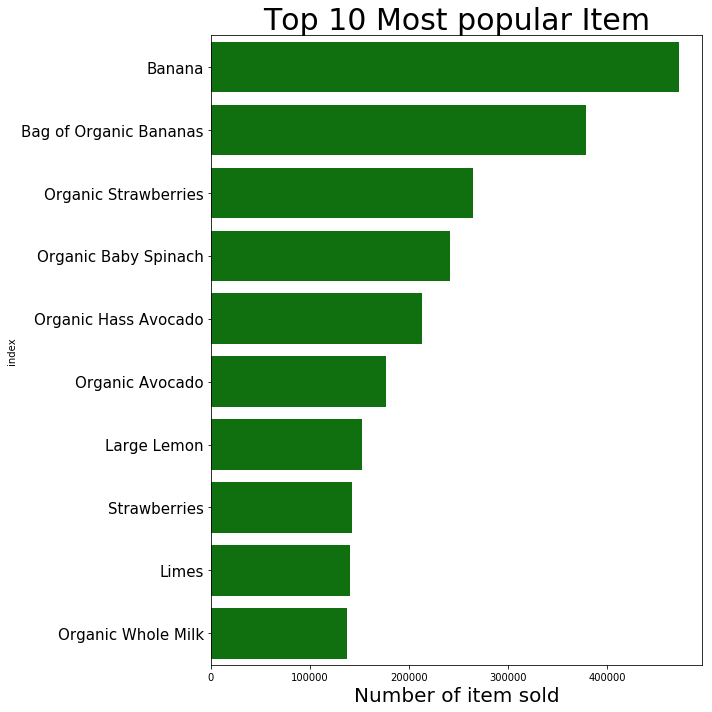

In [68]:
plt.figure(figsize=(10, 10))
sns.barplot(x='product_name', y='index', data=order_products_prior_df.product_name.value_counts().reset_index().head(10), color='g')
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.xlabel(f'Number of item sold', fontsize=20)
plt.title(f'Top 10 Most popular Item', fontsize=30)
plt.tight_layout();

**What happened?**

- Based on the top 10 product that are sold. Banana is the top selling item. Followed by Organic Bananas. 

By only looking at the total sale of the product doesn't provide enough information. Therefore, I will create a bar graph that will demonstrate the most reordered products

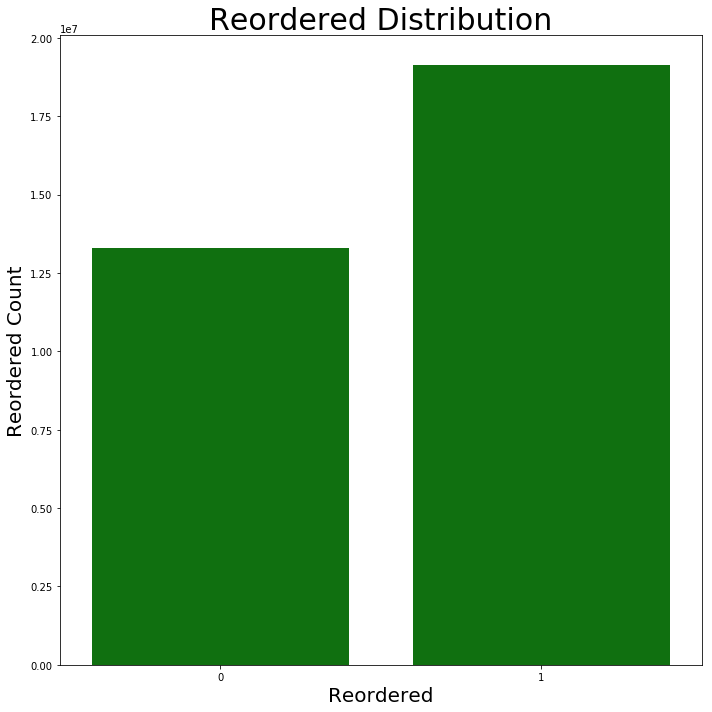

In [69]:
plt.figure(figsize=(10, 10))
sns.countplot(x="reordered", data=order_products_prior_df, color='g')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel(f'Reordered Count', fontsize=20)
plt.xlabel(f'Reordered', fontsize=20)
plt.title(f'Reordered Distribution', fontsize=30)
plt.tight_layout();

In [70]:
print(f'Around '+str(round(len(order_products_prior_df.reordered[order_products_prior_df.reordered==1])/len(order_products_prior_df.reordered)*100,2))+'% of the product were reordered.')

Around 58.97% of the product were reordered.


**What Happened?**

- Based on the graph above, majority of our order were reordered by the client. Now, I just need to find out what kind of product was most reordered.

I will create a dataframe that shows the total reorder and sum of the item that is reordered. By acquiring this I will be able to calculate and find out the top 10 reorder possibility of the item. In other words, I will find out which items has the highest reorder rate.

In [71]:
reordered_product = order_products_prior_df.groupby("product_id")['reordered'].agg({'reorder_sum': sum, 'reorder_total':'count'}).reset_index()
reordered_product['reorder_rate'] = reordered_product['reorder_sum'] / reordered_product['reorder_total']
reordered_product = pd.merge(reordered_product, products_df[['product_id', 'product_name']], on='product_id')
reordered_product = reordered_product[reordered_product.reorder_total > 80].sort_values(by='reorder_rate', ascending=False)[:10]
reordered_product

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,product_id,reorder_sum,reorder_total,reorder_rate,product_name
2074,2075,81,87,0.931034,Serenity Ultimate Extrema Overnight Pads
27734,27740,93,101,0.920792,Chocolate Love Bar
35598,35604,90,100,0.900000,Maca Buttercups
38243,38251,99,111,0.891892,Benchbreak Chardonnay
36794,36801,85,96,0.885417,Organic Blueberry B Mega
10232,10236,113,129,0.875969,Fragrance Free Clay with Natural Odor Eliminat...
20594,20598,98,112,0.875000,Thousand Island Salad Snax
35490,35496,389,451,0.862528,Real2 Alkalized Water 500 ml
5454,5457,75,87,0.862069,Classic Carbonated Natural Mineral Water
9288,9292,2517,2921,0.861691,Half And Half Ultra Pasteurized


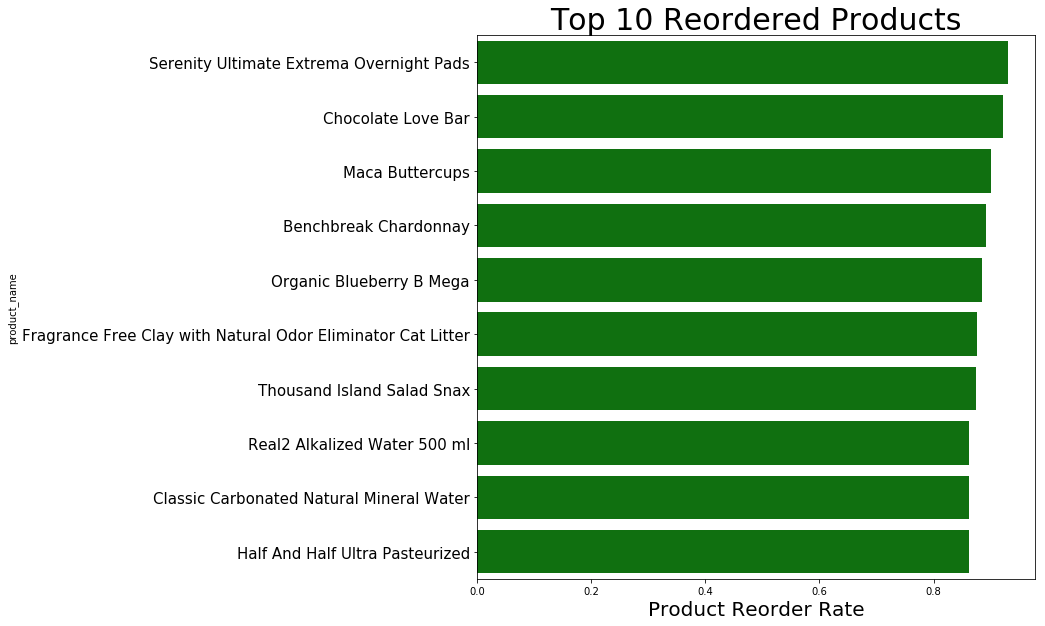

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(x='reorder_rate', y='product_name', data=reordered_product, color='g')
plt.yticks(fontsize=15)
plt.xticks(fontsize=10)
plt.xlabel(f'Product Reorder Rate', fontsize=20)
plt.title(f'Top 10 Reordered Products', fontsize=30);

**What Happened?**

- By looking at this compare with the product sold. We can clearly see the difference. Serenity Ultimate Extrema Overnight Pads are the most reordered item compared with Banana which is the most purchased item.


Next I will look into which day are most likely to get more orders. This is given from my data frame under order_dow. This is ranged from 0 to 6 where 0 is Sunday and 1 is Monday, followed by 2 = Monday and so on. 

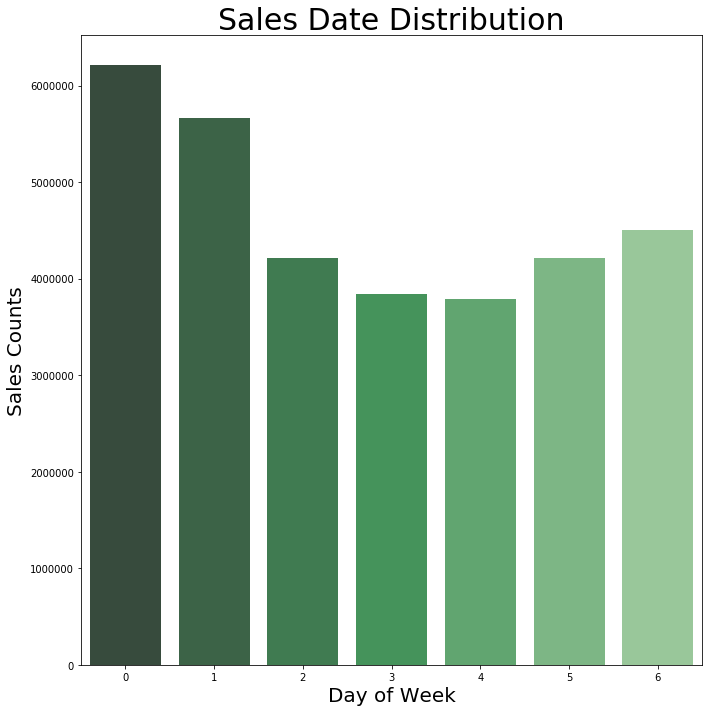

In [73]:
plt.figure(figsize=(10,10))
sns.countplot(x="order_dow", data=order_products_prior_df, palette='Greens_d')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel(f'Sales Counts', fontsize=20)
plt.xlabel(f'Day of Week', fontsize=20)
plt.title(f'Sales Date Distribution', fontsize=30)
plt.tight_layout();

**What happened?**

- Based on the graph above, we can deduced that the highest sales happened over the weekend on Sunday (0). Whereas Thursday (4) has the lowest productivity.
- Majority of the people tend to grocery shopping over the weeknd since they have the most available time. This data make sense. 

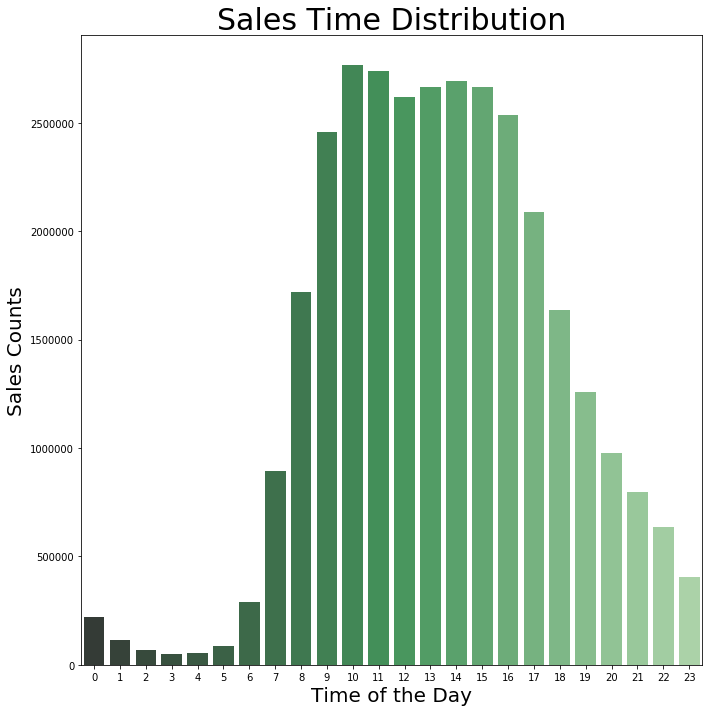

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(x="order_hour_of_day", data=order_products_prior_df, palette='Greens_d')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel(f'Sales Counts', fontsize=20)
plt.xlabel(f'Time of the Day', fontsize=20)
plt.title(f'Sales Time Distribution', fontsize=30)
plt.tight_layout();

**What happened?**

- Above graph is a distribution of the hours of each transaction. We can see the highest peaked at 10 a.m in the morning. That is the time when most user purchase their product. 
- Lowest point is at 3 a.m Since that is the middle of the night, this make sence that the lowest sales occruied at that hour

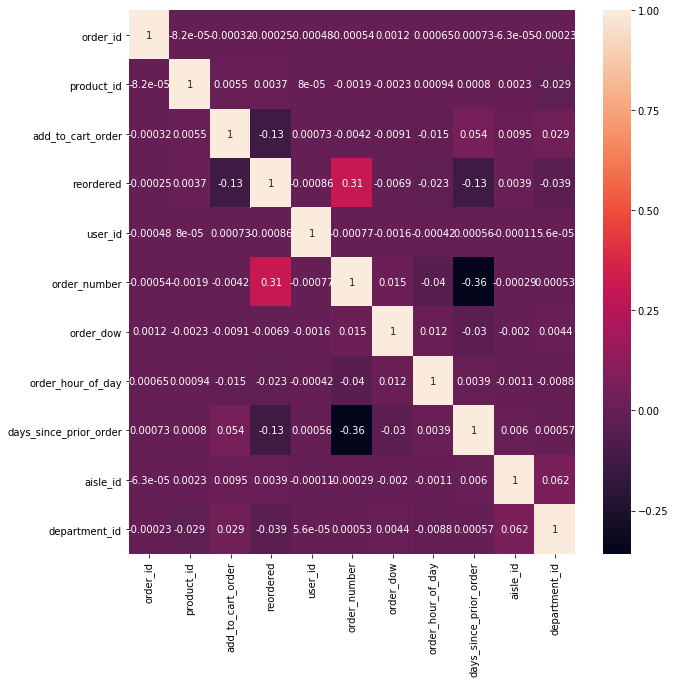

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(order_products_prior_df.corr(), annot=True);

**What happened?**
- Above graph is a correlation betweeen all the columns from the dataframe. Based on the heatmap above, There is no signincant high correlation between the features.

# Feature Engineering
---

After looking into the dataset, I notcied there are some importance I need to address. What will affect my model result the most is the user features. Meaning how each user's behavor will change based on the day of the week, time of the day, their total order.

| User Features | Describtion |
| --- | --- |
| total_order | Each unique user's total order |
| total_product | Total product each user's placed |
| dow_average | average day of the week when user shops |
| days_since_last_order | how frequent the user place order (mean) |

I will first group my new dataframe by user_id and order_id. the product_id that each user purchased will be the total_prodcut they placed, each order_id will be their total_order. day_since_prior_order will be the average date they last purchase and followed by the order_dow will be the average day of the week they make any purchase

In [102]:
user_features = order_products_prior_df.groupby(['user_id', 'order_id'], as_index=False).agg({'product_id': 'count', 'days_since_prior_order':'first','order_dow':'first'})

I will count the order_id and add all the product_id and find the mean or days_since_prior_order and order_dow. 

In [103]:
user_features = user_features.groupby('user_id').agg({'order_id':'count','product_id':'sum','days_since_prior_order':'mean','order_dow':'mean'})

rename my user_features with a new column name that I mentioned above.

In [108]:
new_col = ['total_order','total_product','days_since_last_order','dow_average']

In [111]:
user_features.columns = new_col
user_features.head()

,total_order,total_product,days_since_last_order,dow_average
user_id,,,,
1,10,59,19.555556,2.500000
2,14,195,15.230769,2.142857
3,12,88,12.090909,1.083333
4,5,18,13.750000,4.800000
5,4,37,13.333333,1.750000


count    206209.000000
mean         15.590367
std          16.654774
min           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
max          99.000000
Name: total_order, dtype: float64


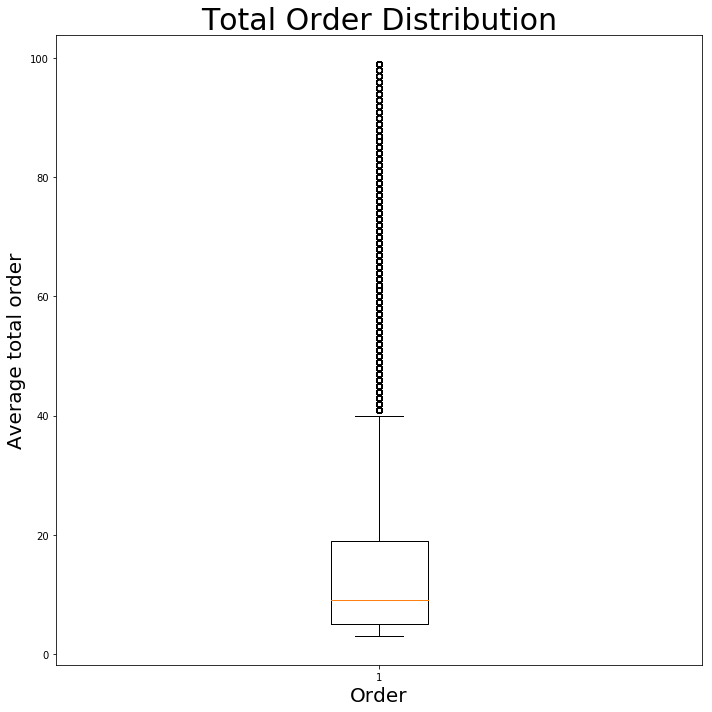

In [129]:
plt.figure(figsize=(10,10))
plt.boxplot(user_features.total_order)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel(f'Average total order', fontsize=20)
plt.xlabel(f'Order', fontsize=20)
plt.title(f'Total Order Distribution', fontsize=30)
plt.tight_layout();
print(user_features.total_order.describe())

**What happened?**

- Our average order which is the mean sits around 15.9

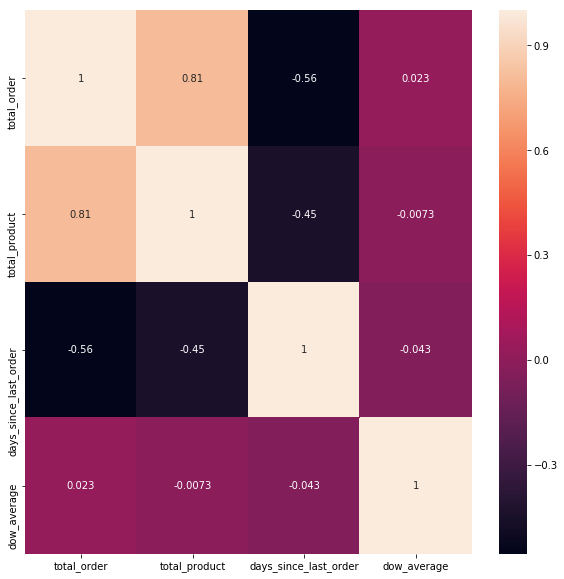

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(user_features.corr(), annot=True);

In [116]:
user_features.to_csv('../datas/user_features.csv')